In [1]:
import csv
import random
import math
import operator
 
from sklearn.metrics import classification_report,confusion_matrix

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename, 'r') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])

In [2]:
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

In [3]:
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors
 

In [4]:
#defined a new function distance(neighborset,testset)
def distance(neighborset,testset):
    dist = 1
    for x in range(len(neighborset)-1):
        dist += abs(neighborset[x] - testset[x])
    print (dist)    
    return 1/dist

def getResponse(neighbors,testset): #added testset for the weighted distance 
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
        #You need some way to define the weight here to decide the weight of each response
		weight = distance(neighbors[x],testset)
		if response in classVotes:
			classVotes[response] += weight #changed 1 to weight
		else:
			classVotes[response] = weight #changed 1 to weight
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

In [5]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [6]:
def main():
# prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.data', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
# generate predictions
    trueResult=[]#added
    predictions=[]
    k = 5
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors,testSet[x])#added testSet[x] for the weighted
        predictions.append(result)
        trueResult.append(testSet[x][-1])
#print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    print(confusion_matrix(trueResult,predictions))
    print('\n')
    print(classification_report(trueResult,predictions))

In [7]:
main()

Train set: 96
Test set: 54
1.2
1.2
1.3
1.3
1.3
1.2
1.3
1.3
1.4
1.4
1.5
1.5
1.6
1.6
1.5
1.5
1.4
1.6
1.6
1.7
1.6
1.9
1.9
1.8
2.0
2.0
2.0
2.0
1.9
2.2
1.1
1.2
1.3
1.3
1.4
1.8
1.9
1.9
2.0
2.1
1.4
1.5
1.6
1.7
1.7
1.2
1.2
1.2
1.3
1.3
1.6
1.6
1.7
1.9
1.9
1.7
1.7
1.9
1.7
1.8
1.0
1.0
1.3
1.3
1.4
1.2
1.5
1.5
1.6
1.6
2.1
2.3
2.2
2.5
2.1
1.2
1.4
1.4
1.5
1.5
1.2
1.2
1.3
1.3
1.5
1.5
1.5
1.7
1.7
1.9
1.4
1.4
1.6
1.6
1.6
1.5
1.5
1.5
1.6
1.7
1.3
1.4
1.6
1.7
1.7
1.8
1.7
2.0
2.2
1.9
1.5
1.5
1.6
1.7
1.7
1.5
1.8
1.8
1.8
2.0
1.6
1.7
2.0
2.0
2.0
1.5
1.8
1.8
1.7
2.0
1.9
2.1
2.1
1.8
1.8
1.2
1.5
1.5
1.7
1.7
1.4
1.5
1.6
1.7
1.8
1.2
1.5
1.7
2.2
2.6
1.2
1.3
1.3
1.4
1.5
1.7
1.8
1.7
1.9
1.7
1.5
1.9
2.0
2.0
2.2
1.6
1.7
1.7
1.7
1.7
2.2
2.3
2.3
2.6
2.2
1.6
1.6
2.1
1.9
2.1
1.5
2.1
2.2
2.3
2.2
1.6
2.3
2.4
2.4
2.4
1.5
1.6
1.6
1.7
1.7
1.5
1.7
1.6
1.8
2.0
1.7
2.1
2.5
2.2
3.2
1.6
2.0
1.9
2.1
2.3
1.5
1.5
1.9
2.0
1.9
1.4
1.8
1.8
1.9
1.7
1.1
1.8
1.8
1.9
2.0
1.5
1.9
1.9
1.9
1.7
2.2
2.1
2.3
2.4
2.2
1.7
1.7
1.8
1.8
2.0
1.2
1.3
1.7
1

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
error_rate = []

# Will take some time
for i in range(1,40):
    trainingSet = []
    testSet = []
    split = 0.67
    loadDataset('iris.data', split, trainingSet, testSet)
    #print ('Train set: ' + repr(len(trainingSet)))
    #print ('Test set: ' + repr(len(testSet)))
    predictions = []
    for j in range (len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[j], i)
        result = getResponse(neighbors,testSet[j])
        predictions.append(result)
    accuracy = getAccuracy(testSet, predictions)
    error_rate.append(100-accuracy)
    #error_rate.append(np.mean(predictions != y_test))

1.2
1.2
1.1
2.0
2.0
1.6
1.1
1.5
1.2
1.6
1.0
1.5
1.2
1.3
1.2
1.5
1.4
1.2
1.5
1.4
1.3
1.5
1.6
1.5
1.5
1.2
1.2
1.5
1.7
1.3
1.9
1.7
1.9
1.2
1.4
1.4
1.4
1.2
1.2
1.3
1.3
1.5
1.6
1.0
1.0
1.3
1.3
1.7
1.8
1.4
1.5
1.2
1.4
1.4
1.3
1.2
1.2
1.6
1.6
1.2
1.3
1.2
1.3
1.2
1.4
1.2
1.3
1.2
1.3
1.5
1.6
1.7
2.0
1.8
1.9
1.8
1.9
1.6
1.4
1.5
1.7
1.5
1.5
1.4
1.5
1.5
1.6
1.3
1.4
1.2
1.4
1.5
1.6
1.5
2.0
1.2
1.5
2.2
2.3
1.2
1.3
1.6
1.5
1.7
1.8
1.3
1.6
1.6
1.7
1.5
1.9
1.2
1.4
1.7
2.1
1.2
1.4
1.1
1.6
1.6
1.9
1.5
1.8
1.9
2.0
1.3
1.7
1.4
1.5
1.4
1.8
1.6
1.5
1.4
1.7
1.1
1.2
1.2
1.5
1.6
1.6
1.0
1.3
1.3
1.3
1.3
1.3
1.6
1.6
1.9
1.5
1.7
1.8
1.2
1.4
1.5
1.4
1.5
1.5
1.4
1.4
1.5
1.8
1.9
1.8
1.4
1.3
1.5
1.2
1.3
1.3
1.6
1.6
1.7
1.7
1.7
1.7
1.0
1.3
1.3
1.5
1.6
1.5
1.2
1.2
1.5
1.1
1.2
1.2
1.2
1.3
1.4
1.5
1.6
1.6
1.2
1.2
1.3
1.2
1.3
1.3
1.2
1.7
1.7
1.4
1.6
1.8
1.5
1.6
1.9
1.5
1.5
1.5
1.8
1.8
1.6
1.2
1.5
1.7
1.4
1.5
1.5
1.2
1.5
1.5
1.6
1.6
1.8
1.2
1.5
1.8
1.5
1.6
1.8
1.4
1.4
1.6
1.2
1.4
1.5
1.2
1.5
2.0
1.3
1.5
1.5
1.7
2.2
2.3
1.2


2.1
2.2
2.7
2.5
2.7
2.7
1.6
1.6
1.6
1.7
1.7
1.6
1.7
1.8
1.9
1.9
1.8
1.6
1.6
1.9
1.9
2.3
2.4
2.3
2.4
2.3
1.6
1.7
1.7
1.8
2.0
1.9
2.0
1.9
1.9
2.0
1.7
2.0
2.2
2.7
2.5
3.5
3.2
3.5
3.7
3.5
1.3
1.5
1.7
1.6
1.8
2.0
2.1
2.1
2.3
2.2
1.6
1.6
1.7
1.4
1.7
2.0
1.9
1.9
2.0
2.1
1.2
1.4
1.7
1.7
1.8
1.8
1.8
1.9
1.9
2.1
1.2
1.3
1.4
1.4
1.7
1.7
1.8
1.9
1.9
1.9
1.4
1.6
1.6
1.7
1.7
1.8
1.7
1.9
2.1
2.0
1.5
1.8
1.8
1.9
2.2
2.4
2.4
2.5
2.0
2.3
1.5
1.7
1.6
1.8
2.0
2.1
2.0
2.0
1.9
2.3
1.4
2.1
2.2
2.1
2.2
2.1
2.2
2.3
2.3
2.3
1.2
1.5
1.5
1.6
1.6
1.7
1.8
1.8
1.6
1.8
1.9
1.1
1.4
1.5
1.6
1.5
1.6
1.6
1.7
1.7
1.6
1.6
1.4
1.9
1.9
1.9
1.8
2.2
2.0
2.2
2.0
2.1
2.2
1.7
2.0
2.0
1.9
2.1
2.3
2.5
2.6
2.3
2.6
2.8
1.7
1.7
1.4
1.9
1.8
1.9
1.9
1.9
2.0
1.7
2.0
1.2
1.4
1.5
1.4
1.5
1.5
1.6
1.6
1.7
1.5
1.5
1.4
1.5
1.5
1.5
1.6
1.7
1.7
1.6
1.8
1.7
1.8
1.4
1.4
1.5
1.4
1.5
1.5
1.6
1.5
1.5
1.6
1.7
1.3
1.6
1.7
1.6
1.6
1.9
1.7
1.9
1.9
1.9
1.9
1.4
1.4
1.4
1.3
1.3
1.5
1.5
1.5
1.5
1.6
1.6
1.5
1.4
1.5
1.6
1.6
1.6
1.6
1.5
1.7
1.7
1.6
1.6
1.5
1.6


3.2
3.0
3.3
2.8
3.4
2.2
2.3
2.3
2.3
2.5
2.4
2.6
2.8
2.9
3.2
3.1
3.3
3.1
3.3
1.6
1.7
2.0
2.2
2.3
2.4
2.5
2.6
2.3
2.7
3.0
2.7
3.0
3.1
1.6
1.5
1.5
1.6
1.9
1.8
2.0
1.8
2.2
2.3
2.4
2.4
2.5
2.4
1.4
1.5
1.7
1.6
2.0
2.0
2.2
2.2
1.9
2.2
2.3
2.1
2.0
2.5
1.5
1.6
1.8
1.9
1.9
2.0
1.8
2.2
2.2
2.1
2.1
2.5
2.3
2.5
1.5
1.8
2.0
2.5
2.1
2.2
2.9
2.7
3.0
3.5
3.5
3.4
3.5
3.7
2.2
2.4
2.5
2.4
2.6
2.7
2.7
2.5
2.9
2.9
3.0
2.9
3.0
3.1
1.7
2.0
1.9
2.1
2.2
2.5
2.8
2.8
2.7
3.1
3.3
3.0
3.1
2.9
1.7
1.7
1.8
1.7
1.8
2.0
2.0
2.1
2.0
2.2
2.2
2.3
2.4
2.3
1.5
1.9
2.0
2.0
2.2
2.1
2.1
2.3
2.2
2.3
2.7
2.6
2.7
2.5
1.5
1.6
1.7
1.8
1.9
1.8
2.0
1.9
1.9
2.3
2.4
2.4
2.5
2.6
1.2
1.7
1.7
1.8
1.8
1.8
2.0
2.1
2.3
2.3
2.0
2.4
2.3
2.3
1.5
1.4
2.0
1.9
1.9
1.9
2.0
2.1
2.0
2.2
2.4
2.5
2.6
2.2
1.4
1.4
1.5
1.5
1.8
1.9
1.7
1.7
1.9
2.0
1.9
2.1
2.1
2.0
1.9
1.8
2.0
1.9
2.0
2.4
2.7
2.7
2.6
3.2
2.7
2.8
3.0
3.2
1.7
2.6
2.7
2.9
2.5
3.2
3.5
3.2
3.6
3.9
4.2
4.3
4.3
4.4
1.5
1.5
1.6
1.7
1.8
1.8
1.9
1.9
1.9
1.7
2.0
1.9
2.1
2.1
1.9
2.2
2.3
2.2
2.1
2.3
2.5


2.5
2.3
2.6
2.5
2.5
1.2
1.3
1.4
1.5
1.5
1.6
1.7
1.7
1.7
1.7
1.8
1.9
1.8
2.0
2.0
2.0
1.9
1.4
1.5
1.7
1.6
1.9
1.9
1.9
2.0
2.2
2.2
2.2
2.2
1.9
2.0
2.2
2.3
2.3
2.4
2.3
2.5
2.4
2.6
2.5
2.6
2.9
2.9
3.0
2.9
2.9
2.9
3.0
3.0
3.2
3.2
2.2
2.3
2.2
2.3
2.6
2.2
2.6
2.6
2.7
2.3
2.9
2.9
2.7
2.6
3.0
3.2
3.2
1.6
1.7
1.6
1.6
1.6
1.7
1.7
1.8
1.8
1.8
1.7
2.0
2.0
2.0
2.1
2.0
2.2
1.7
1.7
1.7
2.1
2.2
2.0
2.2
2.2
2.2
2.3
2.2
2.6
2.6
2.3
2.4
2.8
2.7
1.6
1.6
1.5
1.8
2.0
1.9
2.1
1.9
2.1
2.0
2.2
2.6
2.4
2.4
2.5
2.7
2.6
1.6
2.0
1.7
1.9
2.2
2.4
2.2
2.3
2.4
2.3
2.4
2.6
2.7
2.7
2.9
2.8
2.8
1.9
1.8
2.0
2.2
2.1
2.3
2.2
2.4
2.6
2.3
2.5
2.7
2.9
2.9
2.6
3.3
2.9
1.4
1.7
1.6
1.7
1.7
1.9
2.0
2.1
1.9
2.0
2.0
2.3
2.3
2.3
2.5
2.6
2.6
1.2
1.7
1.7
1.8
2.0
1.8
1.9
1.8
2.1
2.0
2.1
2.2
2.0
2.0
2.3
2.4
2.1
1.2
1.3
1.4
1.7
1.7
1.8
1.9
1.9
1.9
2.1
2.0
2.2
2.2
2.2
2.2
2.0
2.3
1.7
1.5
1.6
1.7
1.7
1.9
1.9
1.8
1.9
1.9
2.1
2.0
2.1
2.0
2.1
2.2
2.3
1.4
1.6
1.7
1.5
1.9
1.8
1.8
1.8
1.9
1.7
2.1
2.2
2.3
2.3
2.3
2.1
2.4
1.3
1.6
1.5
1.5
1.7
1.7
1.8


1.8
1.6
1.6
1.8
1.8
2.1
1.8
1.9
1.9
1.9
2.1
2.3
1.4
1.3
1.4
1.4
1.5
1.6
1.6
1.6
1.7
1.7
1.8
1.8
1.7
1.7
1.8
1.9
1.8
2.0
2.1
2.1
1.2
1.2
1.2
1.4
1.5
1.5
1.5
1.5
1.8
1.6
1.7
1.8
1.8
1.8
2.0
2.0
1.9
1.9
1.7
2.1
1.2
1.3
1.3
1.3
1.4
1.4
1.3
1.6
1.8
1.7
1.7
1.9
1.8
1.8
1.8
1.9
1.9
1.9
2.0
2.2
1.5
1.6
1.5
1.7
1.7
1.8
1.8
1.9
1.8
1.7
2.0
2.0
2.1
2.1
1.9
2.1
2.1
2.2
2.2
2.2
1.3
1.3
1.4
1.5
1.5
1.5
1.6
1.7
1.6
1.6
1.8
1.9
1.9
1.9
1.6
1.9
2.0
1.8
1.9
2.0
1.9
1.9
2.3
2.3
2.3
2.2
2.1
2.6
2.6
2.5
2.6
2.3
2.7
2.8
3.2
3.0
3.0
2.8
3.0
3.3
1.2
1.2
1.5
1.5
1.5
1.6
1.7
1.6
1.6
1.6
1.6
1.7
1.8
1.9
2.1
1.9
1.9
2.0
1.9
2.2
1.2
1.3
1.3
1.3
1.5
1.5
1.6
1.6
1.6
1.5
1.5
1.5
1.6
1.9
1.8
1.8
1.8
1.8
1.8
2.2
1.4
1.4
1.5
1.5
1.5
1.6
1.7
1.5
1.6
1.8
1.9
1.8
2.0
1.8
2.1
1.9
2.1
2.1
2.1
2.1
1.4
1.6
1.6
1.7
1.8
1.8
1.9
1.8
1.7
2.0
1.7
2.0
2.2
2.2
2.1
2.3
2.0
2.2
2.2
2.2
1.5
1.6
1.8
1.9
1.9
2.0
2.1
1.9
2.1
2.1
2.1
2.0
2.0
2.3
2.1
2.1
2.3
2.4
2.0
2.3
1.7
1.8
1.9
2.0
1.9
1.9
2.2
2.1
2.1
2.0
2.3
2.2
2.4
2.4
2.3
2.4
2.6
2.6


2.0
2.0
2.1
2.2
2.1
2.3
2.3
2.4
2.0
2.5
2.2
2.7
2.3
2.4
2.2
2.3
2.4
2.6
2.7
2.4
1.6
1.6
1.7
1.6
1.7
1.7
1.8
1.9
1.9
1.8
1.7
1.7
1.9
2.2
2.2
2.1
2.3
2.0
2.2
2.2
2.2
2.3
1.4
1.6
1.5
1.8
1.7
1.7
1.7
1.9
1.8
2.1
2.2
2.1
1.9
2.3
2.4
2.2
2.4
2.4
2.4
2.6
2.7
2.1
1.8
1.9
2.0
2.0
1.9
2.0
2.0
2.2
2.2
2.4
2.3
2.5
2.5
2.7
2.7
2.8
2.6
2.6
2.7
2.8
2.9
2.9
1.2
1.4
1.6
1.7
1.7
1.9
2.1
1.9
2.1
2.1
2.4
2.4
2.2
2.7
2.5
2.6
2.6
2.6
2.6
2.7
2.6
2.5
1.4
1.4
1.5
1.7
1.6
1.8
1.9
1.9
2.0
2.1
2.0
2.1
2.0
1.8
2.2
2.3
2.2
2.3
2.4
2.2
2.5
2.5
1.3
1.5
1.5
1.8
2.0
2.0
2.0
2.0
2.1
2.0
2.1
2.0
2.1
2.3
2.1
2.1
2.4
2.4
2.3
2.4
2.4
2.6
1.6
1.7
1.8
1.9
2.0
2.2
2.1
2.1
1.9
2.0
2.3
2.1
2.3
2.5
2.5
2.5
2.6
2.4
2.3
2.4
2.6
2.6
1.6
1.7
1.8
1.9
1.9
1.8
2.1
2.1
2.1
1.8
1.8
2.0
2.2
2.0
2.1
2.0
2.2
2.0
2.3
2.4
2.2
2.3
1.6
1.7
1.8
1.6
1.9
1.9
1.9
2.0
2.1
2.2
2.1
2.2
2.4
2.3
2.3
2.3
2.3
2.6
2.5
2.6
2.7
2.6
1.5
1.9
1.8
1.8
2.1
2.1
2.2
2.2
2.2
2.3
2.2
2.1
2.2
2.4
2.5
2.3
2.4
2.5
2.2
2.4
2.4
2.2
1.3
1.4
1.6
1.8
1.6
1.7
1.8
1.8
1.6
1.9


2.2
2.5
2.5
2.8
2.8
1.5
1.7
1.8
1.9
2.0
1.8
1.9
2.0
2.1
2.1
2.2
2.2
2.3
2.1
2.3
2.3
2.4
2.2
2.5
2.1
2.2
2.4
2.6
2.5
1.2
1.5
1.6
1.7
2.0
2.0
2.0
2.2
2.0
2.2
2.3
2.1
2.0
2.1
2.4
2.5
2.3
2.6
3.1
2.9
3.0
3.3
3.2
3.2
1.5
1.8
1.9
1.9
1.7
1.9
2.0
1.9
2.0
2.1
2.1
1.9
2.2
2.3
2.2
2.4
2.4
2.2
2.3
2.4
2.4
2.5
2.4
2.6
1.2
1.9
1.8
2.0
1.9
2.1
1.7
2.3
2.3
2.2
2.1
2.2
2.2
2.1
2.4
2.6
2.6
2.3
2.7
2.5
2.7
2.6
2.8
2.4
1.4
1.5
1.6
1.6
1.6
1.6
1.7
2.1
1.9
2.3
2.2
2.3
2.1
2.2
2.3
2.3
2.7
2.7
2.4
2.4
2.4
2.5
2.4
2.7
1.2
1.4
1.5
1.5
1.5
1.6
1.7
1.7
1.6
1.8
1.7
1.9
2.1
2.1
1.9
2.3
2.6
2.4
2.5
2.4
2.8
2.7
2.7
2.7
1.2
1.4
1.5
1.6
1.8
1.8
1.7
1.7
1.8
1.7
2.0
1.7
2.0
1.9
2.2
2.3
2.1
2.1
2.2
2.4
2.3
2.5
2.1
2.6
1.2
1.5
1.7
2.2
2.2
2.6
2.5
2.5
2.8
3.0
3.0
3.2
3.3
2.8
3.4
3.1
3.5
3.2
3.6
4.0
4.1
3.7
4.3
4.0
1.2
1.3
1.4
1.5
1.7
1.7
1.7
1.8
1.9
2.0
1.8
2.0
1.9
2.1
2.2
2.3
2.4
2.0
2.3
2.2
2.3
2.6
2.5
2.5
1.7
1.9
1.7
1.7
1.9
2.0
1.8
2.1
2.3
2.3
2.3
2.2
2.3
2.3
2.3
2.2
2.5
2.5
2.4
2.6
2.7
2.8
2.7
2.9
1.5
1.6
1.7
1.7
1.7


2.3
2.3
2.5
2.2
2.5
2.4
2.4
2.8
2.9
2.6
2.8
3.0
2.9
3.2
2.8
2.8
3.1
3.0
3.1
2.8
3.5
1.4
1.4
1.5
1.5
1.9
1.7
1.9
1.9
1.9
2.0
1.9
1.9
2.1
1.8
2.2
2.2
2.0
2.0
2.2
2.0
2.3
2.0
2.4
2.4
2.5
2.2
1.6
1.5
1.6
1.7
1.7
1.7
1.8
1.9
2.1
1.9
2.0
2.1
2.0
2.2
2.2
2.2
2.2
2.5
2.5
2.5
2.4
2.4
2.4
2.3
2.7
3.0
1.5
1.6
1.7
1.8
1.8
1.9
1.8
1.8
2.0
2.0
2.1
1.9
2.2
2.3
2.4
2.3
2.3
2.3
2.6
2.5
2.5
2.6
2.3
2.4
2.8
3.1
1.6
1.7
1.8
1.8
1.9
1.8
1.9
1.9
1.7
2.1
2.0
2.0
1.9
1.9
2.1
2.1
2.0
2.0
2.0
2.1
2.0
2.0
2.1
2.4
2.1
2.3
1.3
1.4
1.4
1.7
1.7
1.7
1.9
1.9
1.9
2.0
2.2
2.1
2.2
2.0
2.2
2.1
2.0
2.3
2.3
2.3
2.0
2.4
2.2
2.5
2.4
2.6
1.6
1.7
1.6
1.7
1.6
1.8
1.7
1.8
2.1
2.1
2.0
2.0
2.2
2.2
2.5
2.6
2.4
2.6
3.0
3.1
2.7
3.1
3.0
2.7
2.8
3.2
1.6
1.7
1.7
1.8
1.9
2.1
2.2
2.0
2.4
2.0
2.4
2.0
2.6
2.4
2.5
2.6
2.4
2.3
2.9
2.9
2.8
3.0
3.4
3.5
3.4
3.5
1.4
1.7
1.9
2.0
2.0
2.1
2.0
2.3
2.2
2.2
2.5
2.4
2.4
2.4
2.6
2.9
2.8
2.8
3.2
2.9
3.1
3.4
3.5
3.5
3.2
3.6
1.4
1.5
2.1
2.2
2.1
2.1
2.2
2.1
2.3
2.3
2.3
2.5
2.2
2.4
2.3
2.4
2.6
2.8
2.8
2.9
2.7


1.7
2.0
2.0
1.9
2.1
2.2
2.5
2.8
2.8
2.9
2.7
2.7
2.8
2.8
3.1
2.7
3.3
3.0
2.9
2.7
3.3
3.2
3.2
3.1
3.8
3.6
3.5
1.6
1.6
1.7
1.7
1.8
2.0
1.9
1.8
2.0
2.0
1.9
1.9
2.0
1.9
1.9
2.2
2.3
2.4
2.5
2.6
2.6
2.5
2.7
2.7
2.5
2.7
2.9
2.8
2.1
2.6
2.5
2.2
3.2
2.5
3.2
3.3
3.5
3.8
3.6
3.8
4.0
3.9
3.9
4.0
4.1
4.6
4.6
4.6
4.4
4.5
4.8
4.7
4.6
5.0
5.0
5.1
1.2
1.4
1.5
1.5
1.9
1.7
1.9
1.9
1.7
1.9
2.0
1.9
1.9
2.1
2.1
2.0
1.8
2.2
2.0
2.2
2.0
2.2
2.2
2.0
2.3
2.0
2.5
2.2
2.4
2.6
2.7
2.9
2.5
2.9
3.2
3.5
3.2
3.6
3.5
3.9
3.8
3.9
4.1
4.0
4.3
4.2
4.3
4.3
4.5
4.4
4.7
4.3
4.4
4.5
4.7
4.8
1.1
1.5
1.6
1.7
1.8
1.8
1.8
1.9
1.8
2.0
2.0
2.2
2.1
1.9
2.1
2.2
2.2
2.3
2.3
2.3
2.5
2.5
2.6
2.3
2.4
2.8
2.8
2.8
1.5
1.6
1.7
1.8
1.8
1.9
1.9
1.7
2.1
2.1
2.0
2.0
2.0
1.9
1.9
2.1
2.1
2.0
2.0
2.0
2.1
2.0
2.0
2.1
2.4
2.2
2.3
2.2
1.4
1.5
1.8
1.8
1.9
1.8
1.7
2.0
2.2
2.2
2.4
2.5
2.5
2.4
2.3
2.0
2.5
2.3
2.7
2.4
2.8
2.8
2.6
2.9
2.8
3.0
3.0
2.8
1.3
1.6
1.6
1.6
1.7
1.7
1.8
1.9
2.1
2.2
2.0
2.3
2.4
2.0
2.4
2.6
2.4
2.5
2.6
2.4
2.4
2.3
2.9
2.9
2.8
3.0
3.4


2.3
1.9
2.2
2.2
2.3
2.4
2.4
2.4
2.3
2.6
2.7
2.4
2.4
2.6
2.7
2.7
2.6
2.9
2.9
2.9
2.4
2.2
2.6
2.6
3.1
3.0
1.7
2.0
1.8
1.9
1.8
1.9
2.0
1.8
2.2
2.1
2.2
2.2
2.0
2.2
2.1
2.0
2.1
1.8
2.2
2.1
2.2
2.3
2.3
2.4
2.4
2.5
2.6
2.5
2.5
2.6
1.6
1.6
1.6
1.6
1.8
1.8
1.8
1.9
2.0
2.2
2.1
2.0
2.3
2.5
2.5
2.6
2.4
2.3
2.4
2.4
2.6
2.6
2.6
2.7
2.8
2.7
2.6
2.7
2.8
2.8
1.5
1.5
1.6
1.6
1.7
1.7
1.8
1.8
1.8
1.8
2.0
2.0
2.0
1.8
2.3
2.3
2.4
2.5
2.8
3.0
2.8
2.8
3.0
3.0
3.0
3.1
3.0
2.9
3.0
3.3
1.2
1.9
1.8
2.0
2.1
1.8
1.7
2.3
2.3
2.2
2.2
2.2
2.3
2.4
2.7
2.7
2.7
2.6
2.6
2.6
2.4
2.5
2.8
2.2
2.5
2.7
2.8
2.9
2.4
3.0
1.6
1.8
1.7
1.6
1.9
1.9
1.9
2.1
2.4
2.3
2.4
2.3
2.5
2.3
2.3
2.3
2.6
2.5
2.5
2.7
2.6
2.7
2.8
2.3
2.7
2.8
2.8
2.7
2.7
3.0
1.5
1.8
1.6
1.8
1.9
1.9
1.8
2.1
1.9
2.2
2.3
2.3
2.1
2.5
2.3
2.2
2.3
2.8
2.3
2.7
2.4
2.9
2.6
2.7
3.0
2.9
2.8
2.8
3.1
2.7
1.4
1.7
1.8
1.8
1.7
1.7
1.7
1.9
1.7
1.7
1.7
2.0
1.7
2.0
2.0
2.1
2.1
1.9
1.9
1.9
2.2
2.3
2.1
2.2
2.3
2.6
2.6
2.6
2.6
2.3
1.5
1.5
1.6
1.5
1.6
1.7
1.8
1.8
1.8
2.0
2.0
1.8
2.0
2.0


1.8
1.9
1.9
1.8
1.9
2.0
1.8
1.9
1.9
1.9
2.1
2.1
2.1
2.1
2.1
2.1
2.1
2.3
2.4
2.2
1.5
1.6
1.5
1.5
1.9
1.9
1.8
1.9
1.8
2.0
2.0
2.0
2.1
2.0
2.1
2.0
2.1
1.9
2.2
2.0
2.1
2.5
2.5
2.5
2.5
2.5
2.6
2.8
2.8
2.8
2.7
2.8
1.2
1.3
1.3
1.3
1.3
1.4
1.5
1.3
1.5
1.5
1.6
1.6
1.6
1.6
1.5
1.6
1.7
1.7
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.9
1.8
2.1
2.0
2.0
2.3
1.5
1.7
1.9
1.9
2.1
1.9
2.0
2.4
2.5
2.6
2.2
2.6
2.8
2.7
2.5
2.6
2.5
2.7
2.7
2.6
2.6
2.9
2.7
3.2
3.0
3.1
3.1
2.9
3.1
3.1
3.6
3.0
1.4
1.6
1.6
2.0
2.0
2.0
2.1
2.2
2.1
2.3
2.1
2.0
2.4
2.5
2.2
2.7
2.4
2.2
2.3
2.6
2.4
2.7
2.5
2.6
2.8
2.7
2.6
3.1
2.7
3.1
3.0
3.2
1.4
1.6
1.6
1.6
1.7
1.6
1.7
1.8
1.8
1.9
1.8
1.7
2.0
1.7
1.9
2.1
2.2
2.2
2.2
2.2
2.2
2.3
2.3
2.4
2.3
2.6
2.5
2.5
2.7
2.7
2.6
3.0
1.6
1.4
1.5
1.6
1.7
1.7
1.9
1.7
1.8
1.8
1.9
2.3
2.2
2.2
2.0
2.3
2.3
2.5
2.2
2.3
2.5
2.5
2.3
2.5
2.4
2.4
2.6
2.6
2.4
2.7
2.1
2.5
1.2
2.2
2.6
2.2
2.8
2.7
3.2
3.4
3.1
3.0
3.5
3.0
3.6
3.8
4.0
4.1
4.3
3.9
4.3
4.2
4.3
4.5
4.2
4.9
4.3
4.5
4.4
4.3
4.5
5.0
4.6
4.3
1.5
2.3
2.6
2.7
2.3
2.9


4.0
4.1
3.7
4.3
4.0
4.2
4.5
4.5
4.9
4.2
4.3
5.0
1.7
2.3
2.3
2.7
2.3
2.5
2.4
2.6
2.8
2.9
3.2
3.1
3.3
3.1
3.3
3.4
3.4
3.9
3.3
3.6
3.7
3.9
4.2
3.9
4.0
4.1
4.2
4.4
4.4
4.0
4.3
4.3
4.4
1.6
1.7
2.0
1.9
2.1
2.0
2.2
2.3
2.1
2.7
2.5
2.7
2.6
2.3
2.7
2.8
2.7
3.0
2.9
3.0
3.4
3.6
3.6
3.3
3.5
3.4
3.4
3.4
3.4
3.5
3.5
3.9
3.6
2.0
2.0
2.2
2.1
2.2
2.1
2.3
2.3
2.4
2.5
2.4
2.4
2.5
2.5
2.3
2.7
2.6
2.4
2.5
2.8
3.0
2.6
3.0
3.0
3.1
2.8
2.9
2.9
3.1
3.3
3.0
3.0
3.0
1.6
1.6
1.5
1.8
1.9
1.9
2.1
2.3
2.0
2.4
2.2
2.4
2.2
2.6
2.4
2.4
2.7
2.8
2.7
2.5
2.8
2.4
2.5
2.6
2.5
2.7
2.9
3.0
3.1
3.0
2.6
2.7
2.7
1.5
1.6
1.6
1.6
1.7
1.4
2.0
1.9
1.9
2.0
2.0
2.0
2.1
2.1
2.2
2.0
2.2
2.5
2.6
2.4
2.8
2.9
2.8
3.1
3.1
3.1
3.1
2.8
3.2
2.9
3.2
3.3
3.3
1.7
1.7
1.8
2.0
2.1
2.4
2.5
2.2
2.5
2.6
2.4
2.6
2.8
2.9
2.6
3.0
2.8
3.0
2.9
3.2
2.8
2.8
3.1
3.0
3.1
2.8
3.3
3.5
3.5
3.5
3.2
3.5
3.7
1.2
1.4
1.5
1.9
1.9
1.7
1.9
1.9
1.9
2.0
1.9
1.9
2.1
2.1
1.8
2.2
2.0
2.2
2.2
2.2
2.0
2.3
2.0
2.4
2.4
2.5
2.2
2.3
2.4
2.5
2.4
2.4
2.2
1.1
1.6
1.5
1.6
1.7
1.7
1.8


1.8
1.9
2.1
1.9
1.8
1.9
1.9
2.0
2.3
2.4
2.4
2.4
2.3
2.4
2.4
2.4
2.4
2.5
2.9
2.6
1.1
1.3
1.3
1.3
1.4
1.4
1.4
1.5
1.4
1.6
1.6
1.6
1.6
1.7
1.7
1.7
1.8
1.9
1.9
1.9
1.6
1.9
2.0
2.0
1.9
1.8
2.0
2.0
2.1
2.1
2.2
2.2
2.4
2.5
2.4
1.7
1.8
1.8
1.9
2.0
2.0
1.9
1.8
1.8
1.9
2.2
2.0
2.3
2.3
2.3
2.3
2.3
2.4
2.4
2.6
2.5
2.6
2.9
2.7
2.9
2.9
2.9
2.8
2.8
2.8
3.0
3.1
3.1
3.4
3.6
1.4
1.5
1.6
1.7
1.7
1.7
1.7
1.8
1.8
1.8
1.7
1.8
1.9
1.9
1.9
2.0
2.0
2.0
2.0
2.1
1.9
2.1
1.9
2.0
2.2
2.1
2.2
2.4
2.5
2.7
2.7
2.5
2.8
2.9
3.1
1.2
1.2
1.2
1.3
1.3
1.4
1.4
1.5
1.5
1.5
1.5
1.6
1.5
1.5
1.6
1.7
1.8
1.8
1.8
1.8
2.0
1.8
1.9
1.9
1.9
1.7
1.9
2.1
2.0
2.1
2.2
2.4
2.3
2.5
2.5
1.5
1.6
1.5
1.6
1.5
1.6
1.7
1.7
1.7
2.0
1.8
1.8
2.0
2.0
1.9
1.9
2.1
2.2
2.2
1.8
2.3
2.3
2.3
2.3
2.1
2.4
2.4
2.4
2.2
2.4
2.3
2.5
2.5
2.4
2.6
1.3
1.3
1.4
1.4
1.5
1.5
1.6
1.5
1.5
1.6
1.7
1.8
1.6
1.6
1.8
1.8
1.9
1.9
1.9
1.9
1.9
2.0
2.0
1.8
1.9
2.0
1.9
2.1
2.0
2.0
2.2
2.2
2.4
2.4
2.6
1.5
1.5
1.5
1.9
1.9
1.8
1.9
2.0
2.1
2.0
2.1
2.0
2.1
2.2
2.0
2.1
2.2
2.0
2.3
2.5


2.8
2.5
2.8
2.4
3.0
2.9
3.4
3.1
3.3
3.5
3.6
3.3
1.5
1.7
1.7
1.7
2.0
1.9
1.8
1.9
2.0
2.2
2.0
2.2
2.1
2.1
2.1
2.1
2.1
2.2
1.8
2.2
2.1
2.0
2.3
2.3
2.4
2.2
2.4
2.4
2.5
2.2
2.6
2.5
2.5
2.3
2.6
2.5
2.7
1.2
1.4
1.5
1.7
1.8
1.7
2.1
1.9
2.0
2.2
2.0
2.3
2.5
2.4
2.3
2.4
2.7
2.3
2.3
2.3
2.6
2.5
2.9
2.8
2.8
2.8
2.2
2.8
2.4
2.6
2.9
3.2
3.0
2.7
2.8
2.4
2.8
1.4
1.6
1.6
1.6
1.7
2.1
1.9
2.1
2.3
2.2
2.3
2.2
2.1
2.2
2.3
2.3
2.7
2.7
2.4
2.6
2.4
2.4
2.4
2.8
2.8
2.7
2.4
3.1
3.1
2.9
3.1
2.9
2.8
3.1
3.3
3.1
3.4
1.9
2.1
1.8
1.8
2.1
2.1
2.2
2.3
2.2
2.5
2.2
2.4
2.5
2.5
2.3
2.4
2.5
2.2
2.4
2.4
2.4
2.2
2.3
2.7
2.4
2.6
2.9
2.7
2.7
2.7
3.1
2.6
2.9
3.1
3.2
3.2
3.0
1.6
1.7
2.1
2.1
2.0
2.1
2.4
2.5
2.6
2.3
2.7
2.7
3.0
2.9
3.0
3.4
3.6
3.6
3.5
3.4
3.4
3.4
3.4
3.7
3.4
3.5
3.8
3.9
3.6
3.2
3.9
3.9
4.1
4.3
3.8
4.0
4.2
1.4
1.5
1.7
1.9
1.9
2.2
2.2
2.2
2.2
1.9
2.1
2.2
2.3
2.3
2.3
2.2
2.4
2.1
2.4
2.2
2.6
2.5
2.7
2.5
2.8
2.8
2.5
2.7
2.8
2.7
2.8
2.7
2.7
3.1
3.2
3.2
3.3
1.6
1.7
1.7
1.9
1.9
2.0
1.9
1.8
1.9
2.2
2.2
2.1
2.3
2.5
2.8
2.8


3.0
4.1
4.4
4.9
5.2
5.4
5.2
5.6
5.7
5.8
5.9
5.5
6.0
5.7
1.2
1.3
1.3
1.4
1.4
1.5
1.5
1.5
1.5
1.5
1.8
1.6
1.7
1.8
1.8
1.8
2.0
1.9
1.9
1.7
2.0
2.1
2.1
2.1
2.4
2.5
4.5
5.0
5.4
5.5
5.6
5.8
5.4
6.0
5.9
6.2
5.7
6.1
5.9
1.2
1.3
1.5
1.5
1.3
1.6
1.6
1.6
1.6
1.8
1.7
1.9
2.0
1.9
1.9
2.0
2.2
2.0
2.2
2.2
2.5
2.3
2.4
2.6
2.8
3.3
4.4
4.7
5.2
5.5
5.7
5.5
5.9
6.0
6.1
6.2
5.8
6.0
6.5
1.5
1.6
1.5
1.6
1.7
1.6
1.6
1.8
1.8
1.9
1.8
2.0
2.0
2.1
2.1
1.9
2.1
2.1
2.2
2.2
2.2
2.3
2.2
2.4
2.5
2.8
4.4
4.9
4.9
5.4
5.1
5.3
5.3
5.5
5.4
5.7
5.2
5.6
5.9
1.6
1.7
1.7
1.8
2.0
2.0
2.0
2.2
1.8
2.1
2.5
2.1
2.4
2.4
2.8
2.9
2.7
2.7
2.9
2.9
2.9
3.0
2.8
3.0
3.0
3.4
5.6
6.1
5.9
6.3
6.1
6.5
6.6
6.7
6.2
6.5
6.4
6.4
6.7
1.0
1.0
1.3
1.3
1.3
1.5
1.6
1.5
1.6
1.6
1.8
1.9
2.0
1.8
1.9
2.1
2.1
2.1
2.1
2.1
2.3
2.2
2.6
2.3
2.9
3.2
4.3
4.6
5.1
5.4
5.6
5.4
5.8
5.9
6.0
6.1
6.4
5.7
6.2
1.1
1.2
1.4
1.5
1.4
1.5
1.5
1.6
1.6
1.6
1.6
1.5
1.5
1.6
1.7
1.7
1.7
1.7
1.8
1.9
1.9
2.0
1.9
2.3
2.3
2.6
4.3
4.8
5.3
5.4
5.6
5.4
5.8
6.0
5.9
5.7
6.2
6.1
5.9
1.9
2.1


Text(0,0.5,u'Error Rate %')

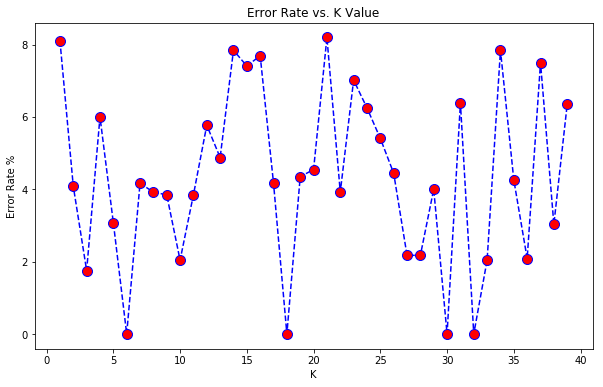

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate %')

In [11]:
import csv
import random
import math
import operator

from sklearn.metrics import classification_report,confusion_matrix

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename, 'r') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])

In [12]:
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

In [13]:
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors
 

In [14]:

def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1 #changed 1 to weight
		else:
			classVotes[response] = 1 #changed 1 to weight
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

In [15]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [16]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.data', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    trueResult=[]#added
    k = 2
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        trueResult.append(testSet[x][-1])
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    print(confusion_matrix(trueResult,predictions))
    print('\n')
    print(classification_report(trueResult,predictions))

In [17]:
main()

Train set: 100
Test set: 50
Accuracy: 96.0%
[[18  0  0]
 [ 0 15  1]
 [ 0  1 15]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.94      0.94      0.94        16

    avg / total       0.96      0.96      0.96        50



In [18]:
error_rate = []

# Will take some time
for i in range(1,40):
    trainingSet = []
    testSet = []
    split = 0.67
    loadDataset('iris.data', split, trainingSet, testSet)
    #print ('Train set: ' + repr(len(trainingSet)))
    #print ('Test set: ' + repr(len(testSet)))
    predictions = []
    for j in range (len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[j], i)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(testSet, predictions)
    error_rate.append(100-accuracy)
    #error_rate.append(np.mean(predictions != y_test))

Text(0,0.5,u'Error Rate')

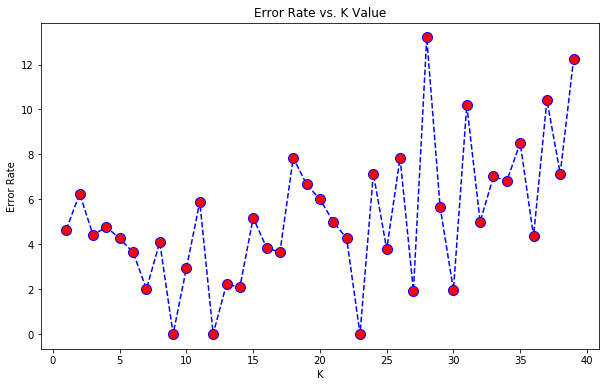

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ImportError: No module named seaborn

In [ ]:
df = pd.read_csv("iris2.data")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
n_arr = arr_2d[2:4,6:9].copy()

In [ ]:
n_arr = 99

In [ ]:
n_arr

In [ ]:
n_arr[:] = 99

In [ ]:
n_arr

In [ ]:
arr_2d

In [ ]:
import numpy as np

In [ ]:
arr = np.arange(0,11)

In [ ]:
arr

In [ ]:
arr + arr

In [ ]:
arr

In [ ]:
arr*arr

In [ ]:
arr - 2

In [ ]:
1 + arr

In [ ]:
1/0

In [ ]:
arr/arr

In [ ]:
0/0

In [ ]:
1/0

In [ ]:
1/arr

In [ ]:
arr ** 2

In [ ]:
np.sqrt(arr)

In [ ]:
np.max(arr)

In [ ]:
np.sin(arr)

In [ ]:
np.log(arr)